## Introduction

In the assignment I'm going to explore the similarity between movie plots based on plot descriptions from wikipedia. Especially in this dataset there are two movies that I really like: Guardians of the Galaxy and Guardians of the Galaxy Vol. 2. I wonder if the fact that in both parts there are same heroes in same universum and the plot is continuous through both parts, is the distance between this two movies will always be the shortest among other movies in this dataset.

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Load Movies dataset

We will be using the dataset of movie descriptions from Wikipedia. Each element of the dataset consists of a link to the movie description on Wikipedia, realese year, title, origin of the movie, director, cast, genere and plot of the movie.

In [195]:
movies = pd.read_csv('movie_plots_wiki.csv')
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [196]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


We can see that this dataset is pretty large and NaN values are present. For further analysis I'll drop all movies except American.

In [197]:
movies = movies.drop(movies[movies['Origin/Ethnicity'] != "American"].index)
movies.sort_values(by="Release Year", ascending=False).head(15)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
17376,2017,Phantom Thread,American,Paul Thomas Anderson,Paul Thomas Anderson (director/screenplay); Da...,drama,https://en.wikipedia.org/wiki/Phantom_Thread,"In 1954 London, renowned fashion designer Reyn..."
17243,2017,"Everything, Everything",American,Stella Meghie,Stella Meghie (director); J. Mills Goodloe (sc...,"romance, drama","https://en.wikipedia.org/wiki/Everything,_Ever...","Eighteen-year-old Maddy suffers from SCID, an ..."
17241,2017,Alien: Covenant,American,Ridley Scott,"Ridley Scott (director); Michael Green, Jack P...","sci-fi, horror",https://en.wikipedia.org/wiki/Alien:_Covenant,"In a prologue, business magnate Peter Weyland ..."
17240,2017,Paris Can Wait,American,Eleanor Coppola,Eleanor Coppola (director/screenplay); Diane L...,"comedy, romance",https://en.wikipedia.org/wiki/Paris_Can_Wait,Anne (Diane Lane) is in Cannes with her husban...
17239,2017,The Wall,American,Doug Liman,Doug Liman (director); Dwain Worrell (screenpl...,"drama, thriller",https://en.wikipedia.org/wiki/The_Wall_(2017_f...,"During the Iraq War, U.S. Army Staff Sergeant ..."
17238,2017,Lowriders,American,Ricardo de Montreuil,Ricardo de Montreuil (director); Justin Tippin...,drama,https://en.wikipedia.org/wiki/Lowriders_(film),A contemporary tale about a teen whose loyalti...
17237,2017,Snatched,American,Jonathan Levine,"Jonathan Levine (director); Katie Dippold, Amy...",comedy,https://en.wikipedia.org/wiki/Snatched_(2017_f...,Recently fired from her job and dumped by her ...
17235,2017,3 Generations,American,Gaby Dellal,"Gaby Dellal (director/screeplay); Naomi Watts,...",drama,https://en.wikipedia.org/wiki/3_Generations_(f...,"The movie opens with sixteen year old ""Ramona""..."
17234,2017,The Lovers,American,Azazel Jacobs,Azazel Jacobs (director/screenplay); Debra Win...,"comedy, romance",https://en.wikipedia.org/wiki/The_Lovers_(2017...,Mary (Debra Winger) and Michael (Tracy Letts) ...
17233,2017,Guardians of the Galaxy Vol. 2,American,James Gunn,"James Gunn (director/screenplay); Chris Pratt,...","superhero, comedy, adventure, sci-fi",https://en.wikipedia.org/wiki/Guardians_of_the...,"In 2014, Peter Quill, Gamora, Drax, Rocket, an..."


In [198]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      17377 non-null  int64 
 1   Title             17377 non-null  object
 2   Origin/Ethnicity  17377 non-null  object
 3   Director          17377 non-null  object
 4   Cast              17060 non-null  object
 5   Genre             17377 non-null  object
 6   Wiki Page         17377 non-null  object
 7   Plot              17377 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


From the number of entries we can see that american movies are about half of all the movies in this dataset.

## Ex. 1: Extract word count vectors

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000)
WCmatrix = vectorizer.fit_transform(movies.Plot)


Computing word count matrix of movie plots from dataset.

## Ex. 2: Find nearest neighbors

**a)** Start by finding the nearest neighbors of the Guardians of the Galaxy plot using the above word count matrix to represent the articles and **Euclidean** distance to measure distance.
Save the distances in `movies['GOTG-eucl']` and look at the top 10 nearest neighbors.

In [200]:
from sklearn.metrics import pairwise_distances

guardians = WCmatrix[movies[movies.Title == "Guardians of the Galaxy"].index]
dist = pairwise_distances(guardians, WCmatrix)

movies["GOTG-eucl"] = dist.T
movies.sort_values(by='GOTG-eucl').head(10)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,GOTG-eucl
16833,2014,Guardians of the Galaxy,American,James Gunn,Vin Diesel\r\nDave Bautista\r\nZoe Saldana\r\n...,superhero,https://en.wikipedia.org/wiki/Guardians_of_the...,"In 1988, following his mother's death, a young...",0.000000
17233,2017,Guardians of the Galaxy Vol. 2,American,James Gunn,"James Gunn (director/screenplay); Chris Pratt,...","superhero, comedy, adventure, sci-fi",https://en.wikipedia.org/wiki/Guardians_of_the...,"In 2014, Peter Quill, Gamora, Drax, Rocket, an...",40.657103
16888,2014,Big Hero 6,American,Chris Williams,Ryan Potter\r\nScott Adsit\r\nJamie Chung\r\nD...,animation comedy,https://en.wikipedia.org/wiki/Big_Hero_6_(film),Hiro Hamada is a 14-year-old robotics genius l...,41.880783
13101,1997,The Postman,American,Kevin Costner,"Kevin Costner, Olivia Williams, Larenz Tate, W...",science fiction,https://en.wikipedia.org/wiki/The_Postman_(film),"In 2013, an unnamed nomad enters the Oregon fl...",42.555846
15152,2007,Beowulf,American,Robert Zemeckis,"Ray Winstone, Anthony Hopkins, John Malkovich,...",fantasy,https://en.wikipedia.org/wiki/Beowulf_(2007_film),"In 507, the legendary Geatish warrior Beowulf ...",42.649736
13028,1997,The Jackal,American,Michael Caton-Jones,"Bruce Willis, Richard Gere, Sidney Poitier, Di...",thriller,https://en.wikipedia.org/wiki/The_Jackal_(1997...,A joint mission of the FBI and the MVD leads t...,42.941821
16983,2015,Avengers: Age of Ultron,American,Joss Whedon,"Robert Downey, Jr.\r\nChris Evans\r\nChris Hem...",action,https://en.wikipedia.org/wiki/Avengers:_Age_of...,"In the Eastern European country of Sokovia, th...",43.760713
7197,1959,Don't Give Up the Ship,American,Norman Taurog,"Jerry Lewis, Dina Merrill, Gale Gordon",comedy,https://en.wikipedia.org/wiki/Don%27t_Give_Up_...,"Following World War II, an entire destroyer es...",43.920383
14093,2002,The Lord of the Rings: The Two Towers,American,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","adventure, fantasy",https://en.wikipedia.org/wiki/The_Lord_of_the_...,After awakening from a dream of Gandalf the Gr...,43.954522
14698,2005,Kingdom of Heaven,American,Ridley Scott,"Orlando Bloom, Eva Green, Jeremy Irons",action,https://en.wikipedia.org/wiki/Kingdom_of_Heave...,"In 1184 France, Balian, a blacksmith, is haunt...",44.045431


For better visibility of results I'm changing the order of column names.

In [201]:
cols = ['Director','GOTG-eucl', 'Title', 'Release Year', 'Plot', 'Genre', 'Cast', 'Origin/Ethnicity', 'Wiki Page']
movies = movies[cols]
movies.sort_values(by='GOTG-eucl').head(10)

,Director,GOTG-eucl,Title,Release Year,Plot,Genre,Cast,Origin/Ethnicity,Wiki Page
16833,James Gunn,0.000000,Guardians of the Galaxy,2014,"In 1988, following his mother's death, a young...",superhero,Vin Diesel\r\nDave Bautista\r\nZoe Saldana\r\n...,American,https://en.wikipedia.org/wiki/Guardians_of_the...
17233,James Gunn,40.657103,Guardians of the Galaxy Vol. 2,2017,"In 2014, Peter Quill, Gamora, Drax, Rocket, an...","superhero, comedy, adventure, sci-fi","James Gunn (director/screenplay); Chris Pratt,...",American,https://en.wikipedia.org/wiki/Guardians_of_the...
16888,Chris Williams,41.880783,Big Hero 6,2014,Hiro Hamada is a 14-year-old robotics genius l...,animation comedy,Ryan Potter\r\nScott Adsit\r\nJamie Chung\r\nD...,American,https://en.wikipedia.org/wiki/Big_Hero_6_(film)
13101,Kevin Costner,42.555846,The Postman,1997,"In 2013, an unnamed nomad enters the Oregon fl...",science fiction,"Kevin Costner, Olivia Williams, Larenz Tate, W...",American,https://en.wikipedia.org/wiki/The_Postman_(film)
15152,Robert Zemeckis,42.649736,Beowulf,2007,"In 507, the legendary Geatish warrior Beowulf ...",fantasy,"Ray Winstone, Anthony Hopkins, John Malkovich,...",American,https://en.wikipedia.org/wiki/Beowulf_(2007_film)
13028,Michael Caton-Jones,42.941821,The Jackal,1997,A joint mission of the FBI and the MVD leads t...,thriller,"Bruce Willis, Richard Gere, Sidney Poitier, Di...",American,https://en.wikipedia.org/wiki/The_Jackal_(1997...
16983,Joss Whedon,43.760713,Avengers: Age of Ultron,2015,"In the Eastern European country of Sokovia, th...",action,"Robert Downey, Jr.\r\nChris Evans\r\nChris Hem...",American,https://en.wikipedia.org/wiki/Avengers:_Age_of...
7197,Norman Taurog,43.920383,Don't Give Up the Ship,1959,"Following World War II, an entire destroyer es...",comedy,"Jerry Lewis, Dina Merrill, Gale Gordon",American,https://en.wikipedia.org/wiki/Don%27t_Give_Up_...
14093,Peter Jackson,43.954522,The Lord of the Rings: The Two Towers,2002,After awakening from a dream of Gandalf the Gr...,"adventure, fantasy","Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...",American,https://en.wikipedia.org/wiki/The_Lord_of_the_...
14698,Ridley Scott,44.045431,Kingdom of Heaven,2005,"In 1184 France, Balian, a blacksmith, is haunt...",action,"Orlando Bloom, Eva Green, Jeremy Irons",American,https://en.wikipedia.org/wiki/Kingdom_of_Heave...


Showing top ten nearest neighbours to Guardians of the Galaxy plot. As I expected, closest is the second part of the movie. On the third place is movie called Big Hero 6 which is also about group of superheroes that are fighting against villains.

**b)** Measure the pairwise distance between the Wikipedia pages of Guardians of the Galaxy, Guardians of the Galaxy Vol. 2 and Big Hero 6. Which of the three pairs has the smallest distance?

In [202]:
gotg_gotg2 = WCmatrix[movies[(movies.Title == "Guardians of the Galaxy") | (movies.Title == "Guardians of the Galaxy Vol. 2")].index]
gotg_bh6 = WCmatrix[movies[(movies.Title == "Guardians of the Galaxy") | (movies.Title == "Big Hero 6")].index]
gotg2_bh6 = WCmatrix[movies[(movies.Title == "Guardians of the Galaxy Vol. 2") | (movies.Title == "Big Hero 6")].index]

distGotg1Ggotg2 = pairwise_distances(gotg_gotg2)
distGotg1BH6 = pairwise_distances(gotg_bh6)
distGotg2BH6 = pairwise_distances(gotg2_bh6)

print("Distance Guardians of the Galaxy - Guardians of the Galaxy Vol. 2:", distGotg1Ggotg2[0][1])
print("Distance Guardians of the Galaxy - Big Hero 6:", distGotg1BH6[0][1])
print("Distance Guardians of the Galaxy Vol. 2 - Big Hero 6:", distGotg2BH6[0][1])

Distance Guardians of the Galaxy - Guardians of the Galaxy Vol. 2: 40.65710270051225
Distance Guardians of the Galaxy - Big Hero 6: 41.88078318274385
Distance Guardians of the Galaxy Vol. 2 - Big Hero 6: 42.13074886588179


The smallest distance is between Guardians of the Galaxy 1st and 2nd part. But the distances aren't much shorter then from Big Hero 6 for both 1st and 2nd part. Let's see in further analysis if Big Hero 6 will stay that close to our main movie - Guardians of the Galaxy.

**c)** Let's look at the most frequently used words in each of Guardians of the Galaxy and Big Hero 6 plots.

In [203]:
def top_words(name):
    df = pd.DataFrame(movies[movies.Title == name].Plot.values[0].split(), columns=["word"])
    count = df.word.value_counts()
    df = count.to_frame("count")
    return df.sort_values(by="count", ascending=False)

In [204]:
gotg_words = top_words('Guardians of the Galaxy')
gotg_words

,count
the,50
to,23
and,19
a,15
Quill,13
...,...
cosmonaut,1
anthropomorphic,1
duck.[N,1
species.,1


In [205]:
bh6_words = top_words('Big Hero 6')
bh6_words

,count
the,47
and,26
to,23
a,20
Hiro,16
...,...
"hyper-sleep,",1
alive,1
"inside,",1
detects,1


Ten most frequent in Guardians of the Galaxy and Big Hero 6 plot descriptions.

**d)** Extract the list of most frequent **common** words that appear in both Guardians of the Galaxy and Big Hero 6 plot descriptions and display the five words that appear most often Big Hero 6 plot description.

In [206]:
common_words = gotg_words.join(bh6_words, lsuffix='_GOTG', rsuffix='_BH6')
common_words.sort_values(by='count_BH6', ascending=False).head(5)

,count_GOTG,count_BH6
the,50,47.0
and,19,26.0
to,23,23.0
a,15,20.0
of,10,12.0


**e)** Among the words that appear in both Guardians of the Galaxy and Big Hero 6, take the 15 that appear most frequently in Guardians of the Galaxy. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [207]:
common_words = gotg_words.join(bh6_words, rsuffix='_BH6').dropna().sort_values(by='count', ascending=False).head(15)
common_words = set(common_words.index)

plots = []
for enum, plot in enumerate(movies.Plot):
    if set(plot.split()).intersection(common_words) == common_words: 
        plots.append(enum)

print(len(plots))

185


In [208]:
movies.iloc[plots]

,Director,GOTG-eucl,Title,Release Year,Plot,Genre,Cast,Origin/Ethnicity,Wiki Page
1118,James Whale,66.151342,Frankenstein,1931,"In a European village, a young scientist, name...","horror, science fiction","Boris Karloff, Frederick Kerr, Mae Clarke",American,https://en.wikipedia.org/wiki/Frankenstein_(19...
2928,Michael Curtiz,52.526184,The Sea Hawk,1940,King Philip II of Spain (Montagu Love) declare...,adventure,"Errol Flynn, Brenda Marshall, Claude Rains",American,https://en.wikipedia.org/wiki/The_Sea_Hawk_(19...
3251,William Morgan,54.396691,Bells of Capistrano,1942,The World Wide Wild West Show is a struggling ...,western,"Gene Autry, Virginia Grey",American,https://en.wikipedia.org/wiki/Bells_of_Capistrano
3364,Herbert I. Leeds,53.488316,Manila Calling,1942,After the Japanese army invades the Philippine...,drama,"Carole Landis, Cornel Wilde",American,https://en.wikipedia.org/wiki/Manila_Calling
3503,Richard Wallace,58.215118,Bombardier,1943,"In 1941, at a staff meeting in Washington, D.C...",war,"Pat O'Brien, Randolph Scott, Anne Shirley, Edd...",American,https://en.wikipedia.org/wiki/Bombardier_(film)
...,...,...,...,...,...,...,...,...,...
17261,Michael Bay,44.631827,Transformers: The Last Knight,2017,"In 484 AD, King Arthur and his knights battle ...","action, adventure, sci-fi","Michael Bay (director); Ken Nolan, Art Marcum ...",American,https://en.wikipedia.org/wiki/Transformers:_Th...
17283,Nikolaj Arcel,59.833101,The Dark Tower,2017,Eleven-year-old Jake Chambers experiences visi...,"action, fantasy, adventure, horror, sci-fi, we...",Nikolaj Arcel (director/screenplay); Jeff Pink...,American,https://en.wikipedia.org/wiki/The_Dark_Tower_(...
17300,Andrés Muschietti,48.682646,It,2017,"In October 1988, Bill Denbrough gives his seve...","horror, fantasy, drama","Andrés Muschietti (director); Chase Palmer, Ca...",American,https://en.wikipedia.org/wiki/It_(2017_film)
17349,Zack Snyder,47.717921,Justice League,2017,"Thousands of years ago, Steppenwolf and his le...","superhero, action, adventure, fantasy, sci-fi","Zack Snyder (director); Chris Terrio, Joss Whe...",American,https://en.wikipedia.org/wiki/Justice_League_(...


185 movie plot descriptions in the dataset contain all 15 words and those movies are listed above.

## Ex. 3: TF-IDF to the rescue

Much of the perceived commonalities between Guardians of the Galaxy and Big Hero 6 were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons.

To retrieve plots that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequency–inverse document frequency) is a feature representation that penalizes words that are too common.

**a)** Repeat the search for the 10 nearest neighbors of Guardians of the Galaxy with Euclidean distance of TF-IDF. This time do not limit to only 10000 most frequent words, but take all of them.

In [209]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
WCmatrix = vectorizer.fit_transform(movies.Plot)

tfidf = TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix)

In [210]:
# now recompute the distances as before but for TF-IDF
dist = pairwise_distances(TFIDFmatrix[movies[movies.Title == "Guardians of the Galaxy"].index], TFIDFmatrix)
# add the distances as a column in the wiki dataframe
movies['GOTG-eucl-TF-IDF'] = dist.T
movies[['Title', 'GOTG-eucl-TF-IDF', 'Genre']].sort_values(by='GOTG-eucl-TF-IDF').head(10)

,Title,GOTG-eucl-TF-IDF,Genre
16833,Guardians of the Galaxy,0.000000,superhero
17233,Guardians of the Galaxy Vol. 2,323.046518,"superhero, comedy, adventure, sci-fi"
16704,Violet & Daisy,365.661108,"action, comedy-drama"
5138,House by the River,366.003626,film noir
11297,Staying Together,366.184576,comedy
50,An Unseen Enemy,366.340600,unknown
3685,They Stooge to Conga,366.416991,comedy short
6900,Space Ship Sappy,366.459758,comedy
5032,Without Honor,366.470046,drama
46,The Musketeers of Pig Alley,366.474686,drama


Top ten nearest neighbours to Guardians of the Galaxy plot with Euclidean distance of TF-IDF. As we can see now Big Hero 6 is not even in top 10.

Let's determine whether this list makes sense. As Guardians of the Galaxy is a great mix of sci-fi action movie, comedy and drama looking by genres at a fritst glance it would make sense that in case of plot of the movie those films are close to Guardians of the Galaxy. But naturally Vol. 2 is the closest and I'm going to investigate that similarity in further analysis.

**b)** Sort the words in Guardians of the Galaxy plot by their TF-IDF weights; do the same for Guardians of the Galaxy Vol. 2 plot as well.
Using the **join** operation we learned earlier, compute the common words shared by Guardians of the Galaxy Vol. 1 and Vol 2 plots.
Sort the common words by their TF-IDF weights in Guardians of the Galaxy plot description.

In [211]:
def top_words_tf_idf(title):
    """
    Get a table of the largest tf-idf words in the given movie title's wikipedia plot description.
    """
    words = movies[movies.Title == title]['Plot'].values[0].split()
    ind = {v : i for i, v in enumerate(vectorizer.get_feature_names_out())}
    weigths = []
    for word in words:
        if word in ind:
            weigths.append(TFIDFmatrix[movies[movies.Title == title].index][0, ind[word]])
        else: weigths.append(1)
    
    df = pd.Series(weigths, words).to_frame("tf-idf")
    df.drop_duplicates(inplace=True)
        
    return df.sort_values(by="tf-idf", ascending=False)

In [212]:
gotg_tf_idf = top_words_tf_idf('Guardians of the Galaxy')
gotg2_tf_idf = top_words_tf_idf('Guardians of the Galaxy Vol. 2')
common_words = gotg_tf_idf.join(gotg2_tf_idf, lsuffix='_GOTG',rsuffix="_GOTG2")
common_words.dropna().sort_values(by='tf-idf_GOTG', ascending=False).head(15)

,tf-idf_GOTG,tf-idf_GOTG2
the,54.125111,39.827912
group,26.742420,2.971380
to,23.724713,25.787731
destroy,19.903554,7.961421
and,19.732296,32.194798
ship,18.704632,14.963705
a,18.329287,16.292700
power,15.353162,11.514871
with,14.913131,9.177312
his,13.704521,9.136347


Top 15 words from Guardians of the Galaxy Vlo. 1 and Vol. 2 plots sorted by TF-IDF weigth in Guardians of the Galaxy plot description.

**c)** Among the words that appear in both Guardians of the Galaxy Vol. 1 and Vol. 2, take the 15 that have largest weights in Vol. 1. How many of the plot descriptions in the Movies dataset contain all of those 15 words? Which are they?

In [213]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names_out())} # a dictionary with words as keys and indices as values

# Your code goes here

common_words = gotg_tf_idf.join(gotg2_tf_idf, rsuffix="_Gotg2")
gotg_common = common_words.dropna().sort_values(by="tf-idf", ascending=False).head(15)
plots = WCmatrix[:, [word_to_ind[word] for word in gotg_common.index]]
plots = [i for i, plot in enumerate(plots) if plot.todense().all()]
print(len(plots))

5


In [214]:
movies.Title[plots]

9882           Piranha II: The Spawning
10832                        Spaceballs
16359        Resident Evil: Retribution
16833           Guardians of the Galaxy
17233    Guardians of the Galaxy Vol. 2
Name: Title, dtype: object

Five movies in the Movies dataset contain all of those 15 words with biggest weigths in Guardians of the Galaxy plot description.

## Ex. 4: Choosing metrics

**a)** Compute the Euclidean distance between TF-IDF features of Guardians of the Galaxy Vol. 1 and Vol. 2.

In [215]:
dist = pairwise_distances(TFIDFmatrix[movies[(movies.Title == "Guardians of the Galaxy") | (movies.Title == "Guardians of the Galaxy Vol. 2")].index])
print("TF-IDF Distance between Guardians of the Galaxy vol. 1  and vol. 2:", dist[0][1])

TF-IDF Distance between Guardians of the Galaxy vol. 1  and vol. 2: 323.0465184235231


The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [216]:
movies.sort_values(by='GOTG-eucl-TF-IDF',ascending=True)[['Title','GOTG-eucl-TF-IDF']][0:10]

,Title,GOTG-eucl-TF-IDF
16833,Guardians of the Galaxy,0.000000
17233,Guardians of the Galaxy Vol. 2,323.046518
16704,Violet & Daisy,365.661108
5138,House by the River,366.003626
11297,Staying Together,366.184576
50,An Unseen Enemy,366.340600
3685,They Stooge to Conga,366.416991
6900,Space Ship Sappy,366.459758
5032,Without Honor,366.470046
46,The Musketeers of Pig Alley,366.474686


Even tho when we compute nearest neighbors using the Euclidean distances and unwittingly favor short descriptions over long ones, Guardians of the Galaxy Vol. 2 is still on the second place.

**b)** Let us compute the length of each movie plot description, and examine the descroption lengths for the 100 nearest neighbors to Guardians of the Galaxy plot.

In [217]:
def compute_length(row):
    return len(row.split())

movies['length'] = [compute_length(row) for row in movies.Plot]

In [218]:
nearest_neighbors_euclidean = movies.sort_values(by='GOTG-eucl-TF-IDF', ascending=True)[['Title', 'length', 'GOTG-eucl-TF-IDF']].head(100)
nearest_neighbors_euclidean

,Title,length,GOTG-eucl-TF-IDF
16833,Guardians of the Galaxy,683,0.000000
17233,Guardians of the Galaxy Vol. 2,670,323.046518
16704,Violet & Daisy,169,365.661108
5138,House by the River,144,366.003626
11297,Staying Together,93,366.184576
...,...,...,...
1130,The Guardsman,71,367.124423
4970,Port of New York,54,367.124482
2032,Captain Calamity,116,367.129444
9050,Invasion from Inner Earth,60,367.130928


As we can see Guardians of the Galaxy Vol. 2 is on the second place despite having significantly longer description than Violet & Daisy or House by the River.

**c)** To see how these plot description lengths compare to the lengths of other descriptions in the corpus, make a histogram of the plot description lengths of Guardians of the Galaxy 100 nearest neighbors and compare to a histogram of description lengths for all descriptions.

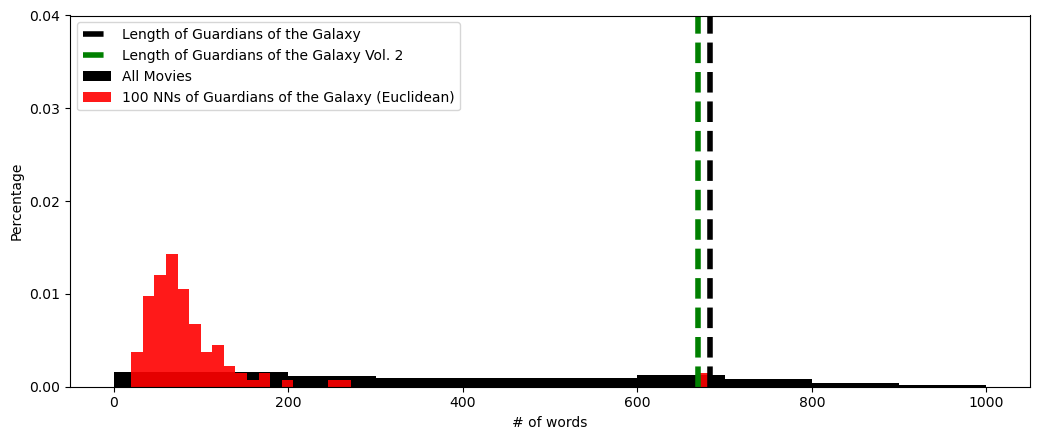

In [219]:
plt.figure(figsize=(10.5,4.5))
plt.axvline(movies[movies.Title == "Guardians of the Galaxy"].length.values[0], label='Length of Guardians of the Galaxy', color='black', linestyle='--', linewidth=4)
plt.axvline(movies[movies.Title == "Guardians of the Galaxy Vol. 2"].length.values[0], label='Length of Guardians of the Galaxy Vol. 2', color='green', linestyle='--', linewidth=4)
plt.hist(movies.length, range=[0, 1000], density=True, color='black', label='All Movies')
plt.hist(nearest_neighbors_euclidean.length, bins=50, alpha=0.9, density=True, color='red', label='100 NNs of Guardians of the Galaxy (Euclidean)')

plt.xlabel("# of words")
plt.ylabel("Percentage")
plt.yticks(np.arange(0.00, 0.041, 0.01))
plt.legend()
plt.tight_layout()
plt.show()

Relative to the rest of Wikipedia, nearest neighbors of Guardians of the Galaxy are overwhemingly short, most of them being shorter than 200 words. The bias towards short descriptions is not appropriate in this application as there is really no reason to  favor short descriptions over long descriptions (they are all Wikipedia movie plot descriptions, after all). Many of the Wikipedia descriptions are 200 words or more, and both Guardians of the Galax Vol. 1 and Vol. 2 are over 600 words long.

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two descriptions of varying lengths.

**d)** Train a new nearest neighbor model, this time with cosine distances.  Then repeat the search for Guardians of the Galaxy 100 nearest neighbors and make a plot to better visualize the effect of having used cosine distance in place of Euclidean on our TF-IDF vectors.

In [220]:
cosine_dist = pairwise_distances(TFIDFmatrix[movies[movies.Title == "Guardians of the Galaxy"].index], TFIDFmatrix, metric="cosine")
movies["GOTG-cosine-TF-IDF"] = cosine_dist.T
nearest_neighbors_cosine = movies.sort_values(by='GOTG-cosine-TF-IDF', ascending=True)[['Title', 'length', 'GOTG-cosine-TF-IDF', 'Genre']].head(100)
nearest_neighbors_cosine.head(15)

,Title,length,GOTG-cosine-TF-IDF,Genre
16833,Guardians of the Galaxy,683,0.000000,superhero
17233,Guardians of the Galaxy Vol. 2,670,0.456866,"superhero, comedy, adventure, sci-fi"
12802,The Phantom,835,0.734231,action
7166,Anatomy of a Murder,648,0.742936,crime drama
13902,Megiddo: The Omega Code 2,1039,0.850402,fantasy
16398,V/H/S,1860,0.859872,"anthology, horror"
13282,Lost In Space,870,0.862828,science fiction
14820,The Astronaut Farmer,516,0.865680,drama
16850,"As Above, So Below",761,0.868776,horror
15480,Meet Dave,868,0.871972,comedy


Guardians of the Galaxy 100 nearest neighbors computed with cosine distances.

From a glance at the above table, things look better. More action and sci-fi movies are listed in top 15 results. Looking at the titles most of them is releted to space and superheroes which is what we would expect while finding movie with similar plot to Guardians of the Galaxy.

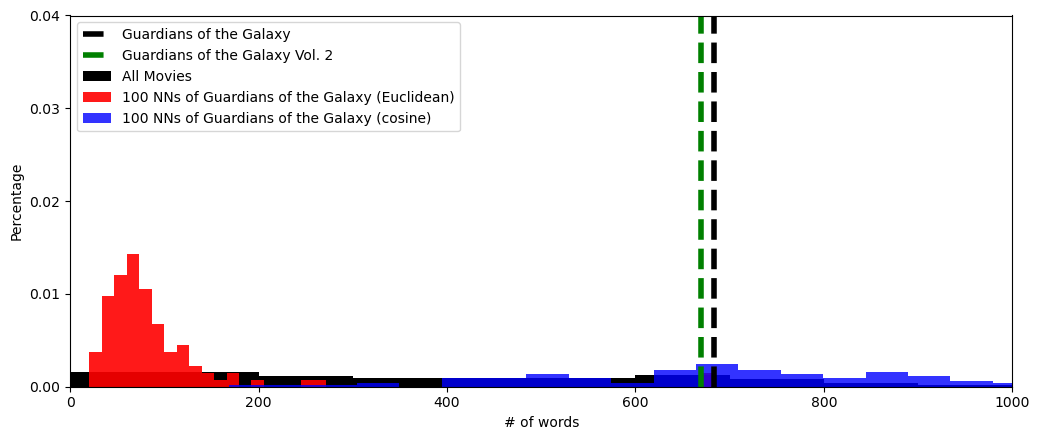

In [221]:
plt.figure(figsize=(10.5,4.5))
plt.axvline(movies[movies.Title == "Guardians of the Galaxy"].length.values[0], label='Guardians of the Galaxy', color='black', linestyle='--', linewidth=4)
plt.axvline(movies[movies.Title == "Guardians of the Galaxy Vol. 2"].length.values[0], label='Guardians of the Galaxy Vol. 2', color='green', linestyle='--', linewidth=4)
plt.hist(movies.length, range=[0, 1000], density=True, color='black', label='All Movies')
plt.hist(nearest_neighbors_euclidean.length, bins=50, alpha=0.9, density=True, color='red', label='100 NNs of Guardians of the Galaxy (Euclidean)')
plt.hist(nearest_neighbors_cosine.length, bins=50, alpha=0.8, density=True, color='blue', label='100 NNs of Guardians of the Galaxy (cosine)')

plt.xlabel("# of words")
plt.ylabel("Percentage")
plt.yticks(np.arange(0.00, 0.041, 0.01))
plt.xlim([0, 1000])
plt.legend()
plt.tight_layout()
plt.show()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of description lengths, rather than just short descriptions like Euclidean distance provided.

## Ex. 5: Problem with cosine distances: tweets vs. long articles

Happily ever after? Not so fast. Cosine distances ignore all document lengths, which may be great in certain situations but not in others. For instance, consider the following (admittedly contrived) example.

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Guardians of the Galaxy Vol. 2 is even better then    |
|  the first vol.                                        |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

**a)** Transform the tweet into TF-IDF features, using the fit to the Movies dataset. (That is, let's treat this tweet as an movie plot description in our Movies dataset and see what happens.) How similar is this tweet to Guardians of the Galaxy plot description? 

In [222]:
df = pd.DataFrame({'text': ['guardians of the galaxy vol 2 is even better then the first vol']})

TF_IDF = tfidf.transform(vectorizer.transform(df.text))

def top_words_tf_idf(df):
    words = df.text.values[0].split()
    ind = {v : i for i, v in enumerate(vectorizer.get_feature_names_out())}
    words_weigths = [TF_IDF[0, ind[word]] for word in words]
    words_count = [words.count(word) for word in words]
    data = {"word count" : words_count, "tf_idf" : words_weigths}
    df = pd.DataFrame(data, index=words)
    return df
top_words_tf_idf(df)

,word count,tf_idf
guardians,1,7.328916
of,1,1.065333
the,2,2.042457
galaxy,1,6.956240
vol,2,20.139511
2,1,3.879440
is,1,1.080997
even,1,2.885506
better,1,3.839274
then,1,1.822405


Let's compare this tweet's TF-IDF vectors  to Guardians of the Galaxy Movies entry.

In [223]:
gotg_tf_idf

,tf-idf
orb,71.367205
the,54.125111
warhammer,32.288708
group,26.742420
to,23.724713
...,...
not,1.738049
she,1.524850
out,1.519902
at,1.368659


**b)** Now, compute the cosine distance between the Guardians of the Galaxy plot description and this tweet:

In [224]:
from sklearn.metrics.pairwise import cosine_distances # for one pair of samples we can just use this function

cosine_distances(TFIDFmatrix[movies[movies.Title == "Guardians of the Galaxy"].index], TF_IDF)

array([[0.96115664]])

Let's compare this distance to the distance between the Guardians of the Galaxy description and all of its Movies nearest neighbors:

In [225]:
nearest_neighbors_cosine[0:30]

,Title,length,GOTG-cosine-TF-IDF,Genre
16833,Guardians of the Galaxy,683,0.000000,superhero
17233,Guardians of the Galaxy Vol. 2,670,0.456866,"superhero, comedy, adventure, sci-fi"
12802,The Phantom,835,0.734231,action
7166,Anatomy of a Murder,648,0.742936,crime drama
13902,Megiddo: The Omega Code 2,1039,0.850402,fantasy
16398,V/H/S,1860,0.859872,"anthology, horror"
13282,Lost In Space,870,0.862828,science fiction
14820,The Astronaut Farmer,516,0.865680,drama
16850,"As Above, So Below",761,0.868776,horror
15480,Meet Dave,868,0.871972,comedy


As we can see, the tweet is not even in top 30 closest neighbors to Guardians of the Galaxy	and that makes sens, tweets are not for describing long events but for short summaries or comments. 

## Conclusions

Through this analysis I made many actions to find nearest neighbors to plot of Guardians of the Galaxy movie, that is most similar movies. During this steps all of them seemed resonable, in my opinion the best result I got was from first simple euclidean search of closest neigbors. Maybe it's because I know that movies from result or maybe searching that way for similar stories isn't good idea. I personally lean towards the second option. To prove my point, in top 10 euclidean nearest neighbors is movie titled "Avengers: Age of Ultron" which action takes place in same universum as Guardians of the Galaxy. But one thing went just as I expected: in all cases Guardians of the Galaxy Vol. 2 was the nearest neighbor and that answers my question from introduction, if two parts of the movie will always be the closest to each other, and the answer is yes!